In [1]:
# Gives the discrete, linear convolution of two one-dimensional sequences.
# some goodies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import convolutionF as F
from scipy.stats import norm

In [2]:
x = np.arange(-50, 50, 1./3)
dx = x[1]-x[0]

In [3]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

<function matplotlib.pyplot.show>

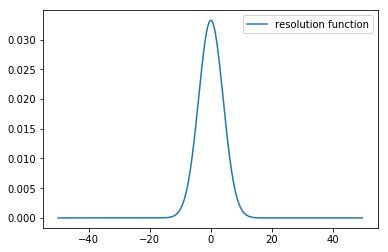

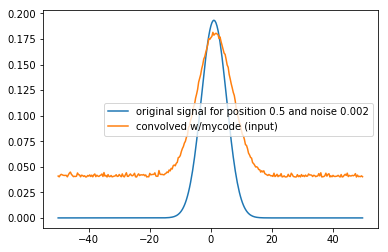

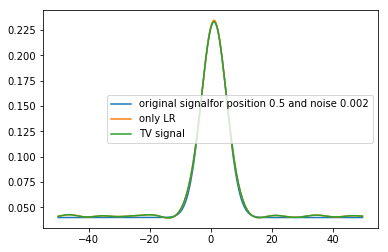

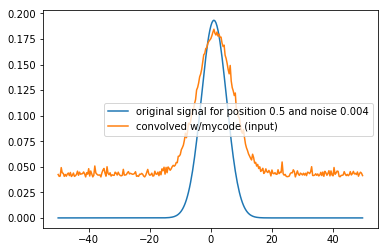

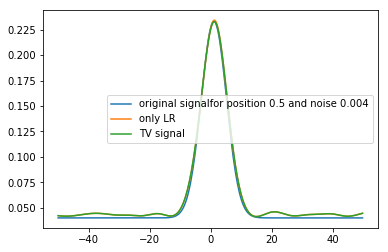

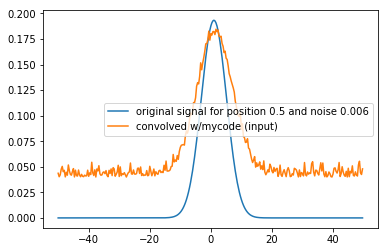

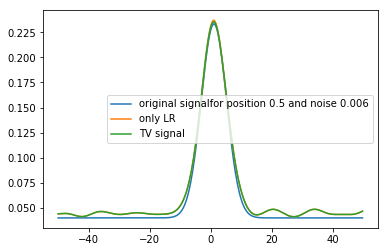

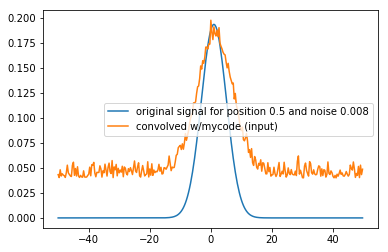

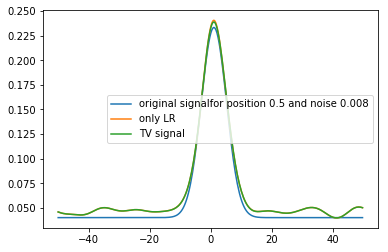

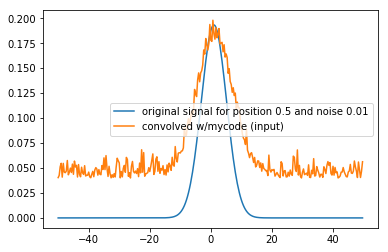

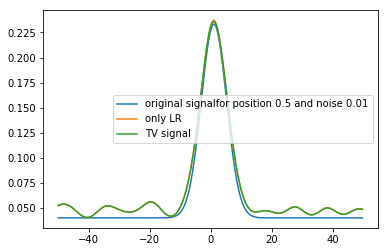

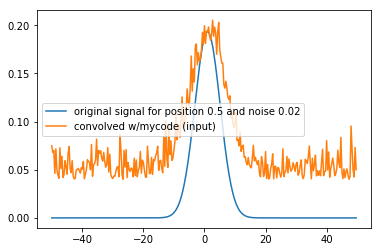

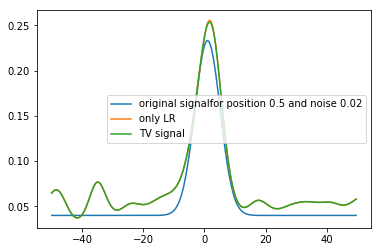

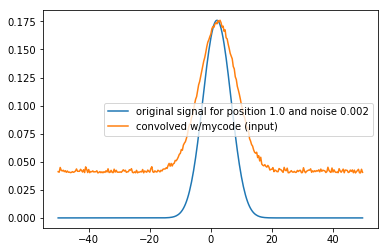

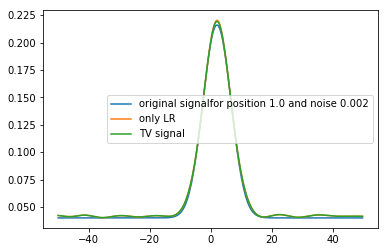

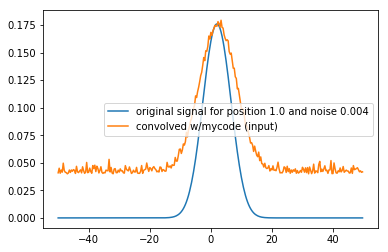

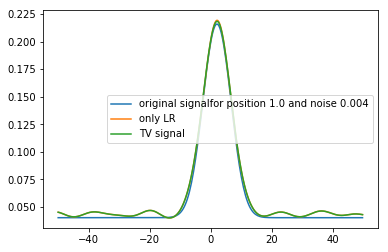

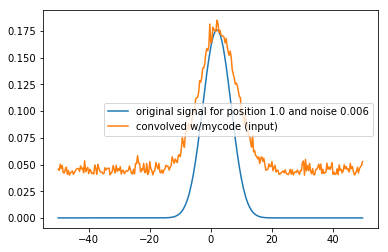

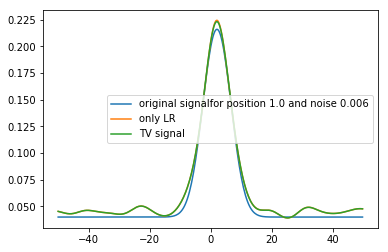

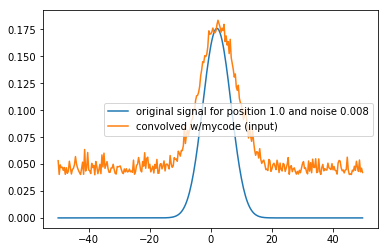

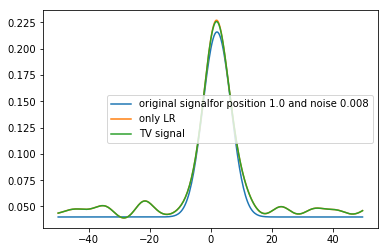

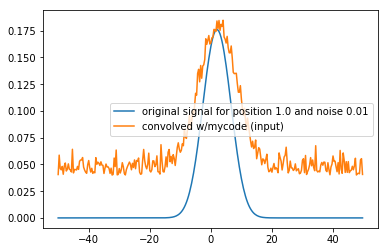

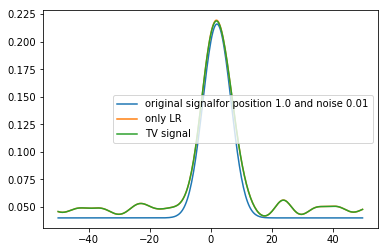

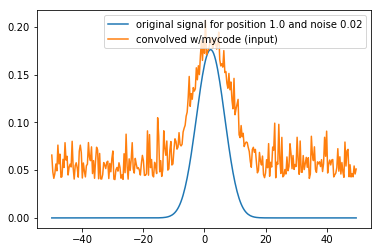

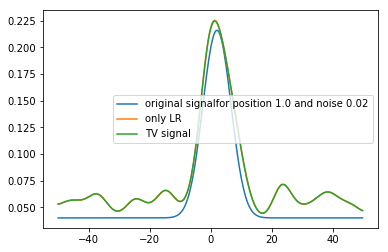

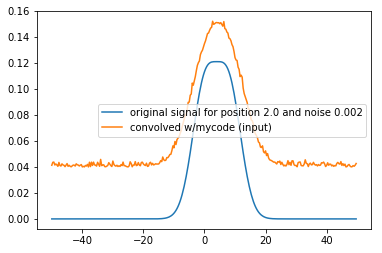

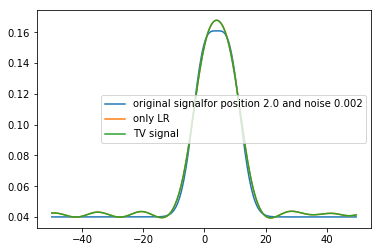

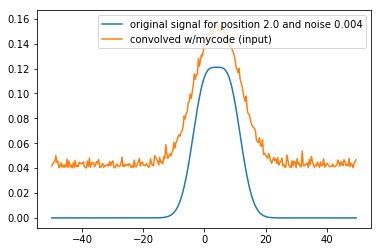

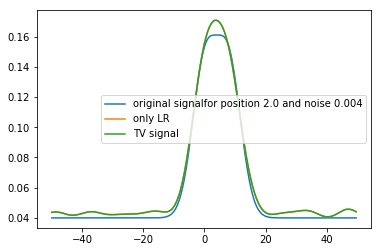

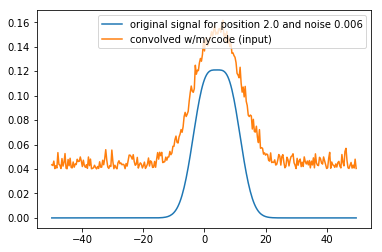

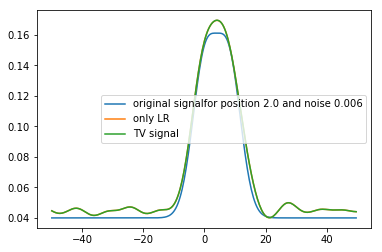

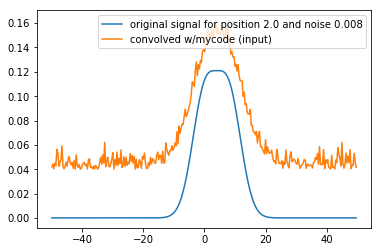

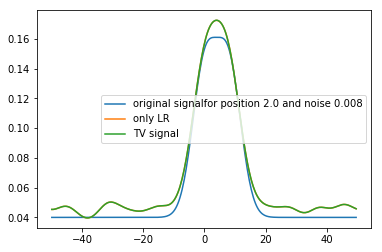

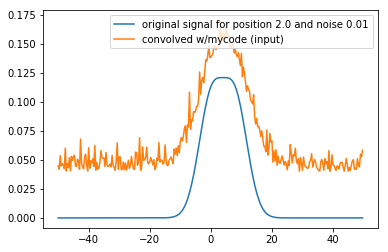

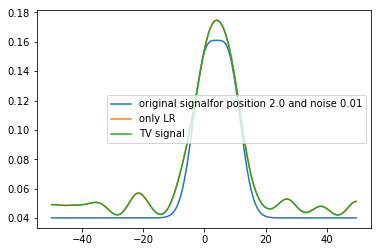

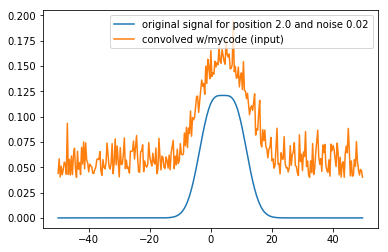

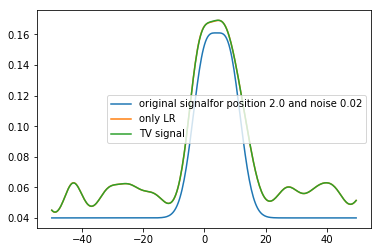

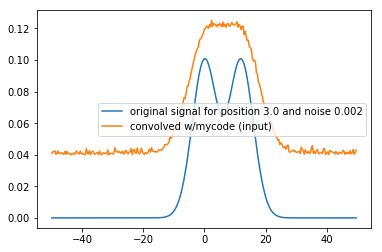

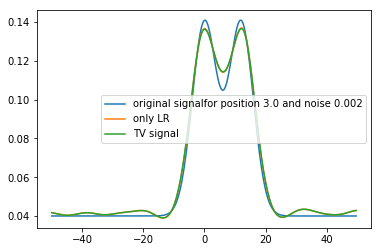

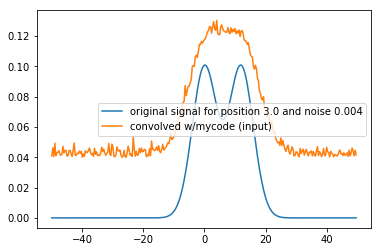

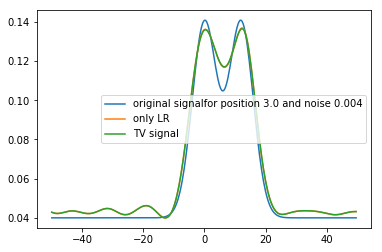

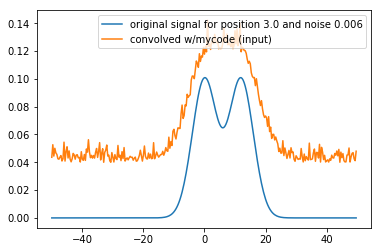

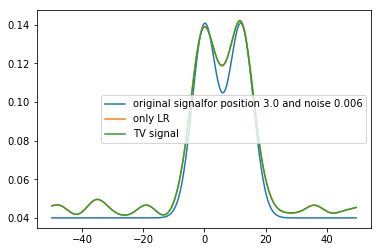

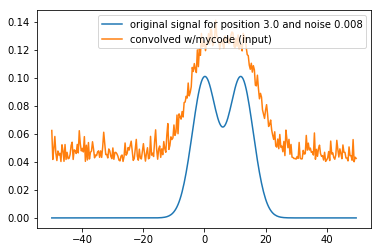

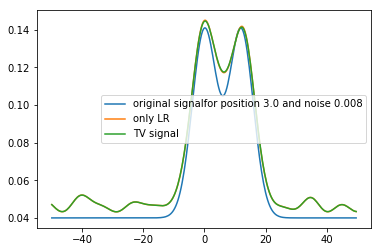

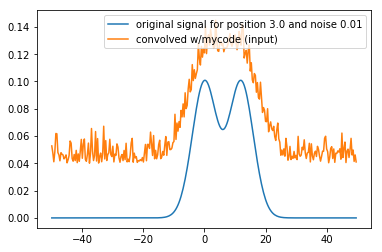

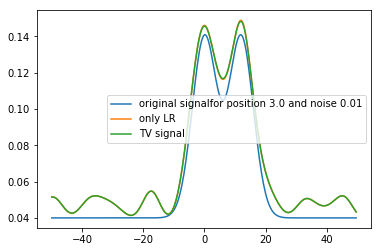

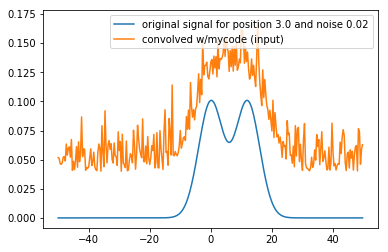

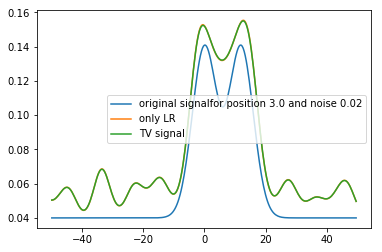

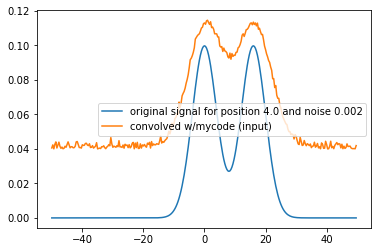

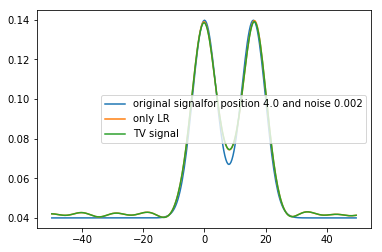

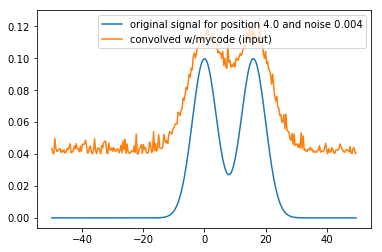

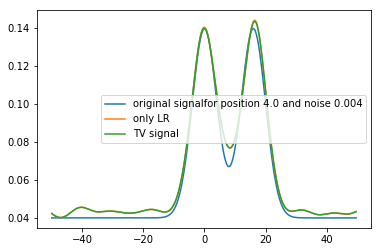

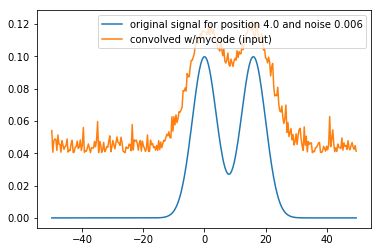

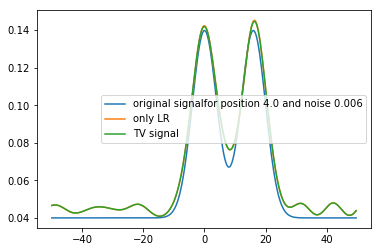

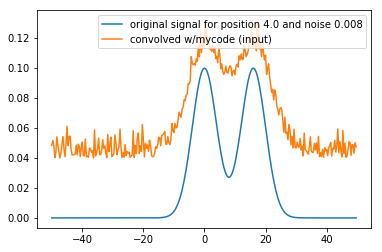

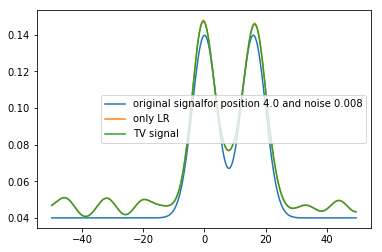

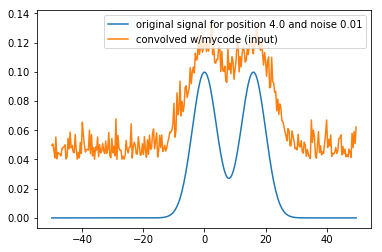

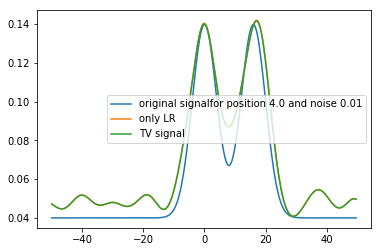

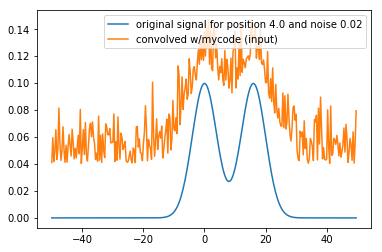

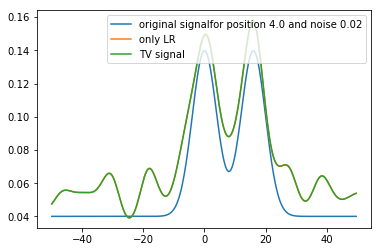

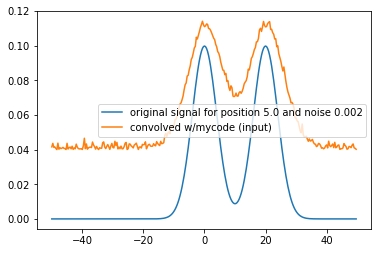

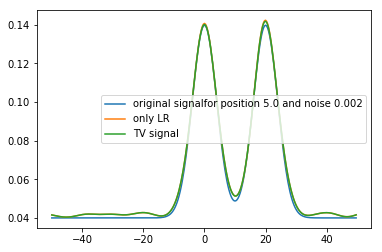

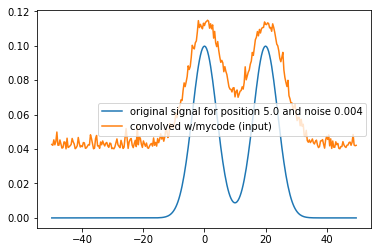

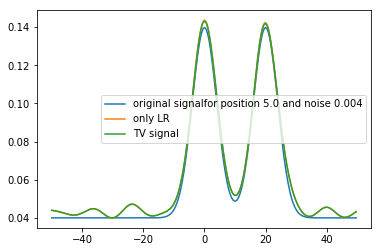

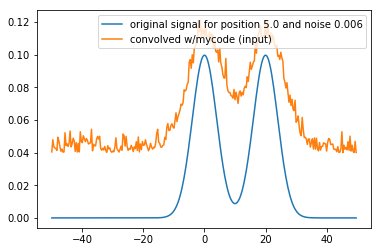

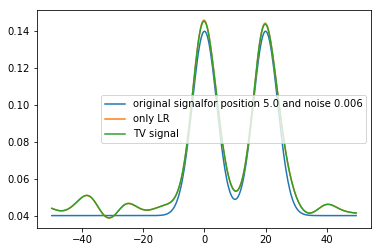

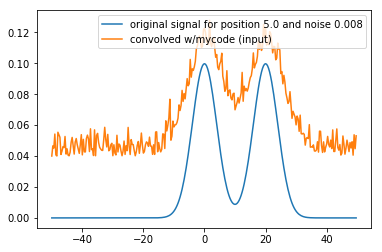

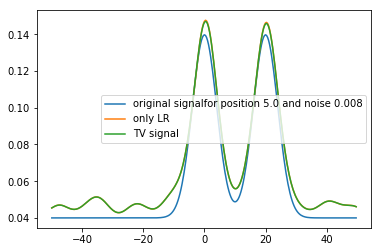

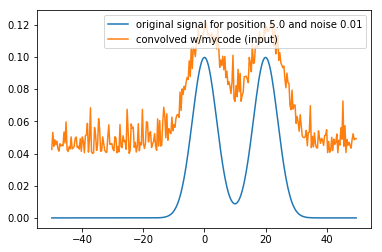

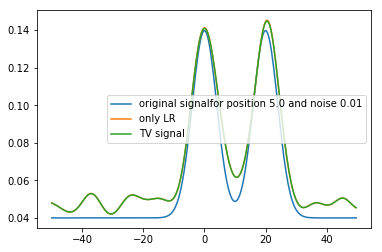

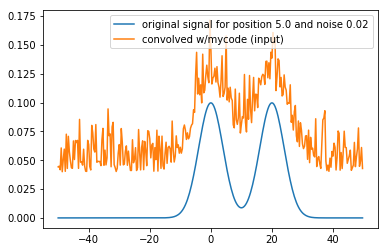

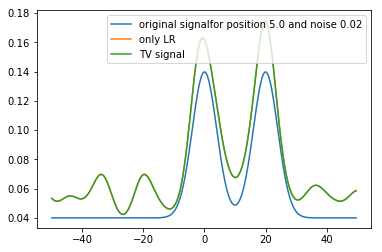

In [24]:
position=[0.5, 1., 2., 3., 4., 5.]

sig=0*np.ones(len(x))
RF=gauss(x, 1., 0., 4)*dx
plt.figure() #plot the resolution function
plt.plot(x,RF,label='resolution function')
plt.legend()
S_=0*np.ones(len(x)+len(x)-1)

for p in position:
    sigma=4.
    bkg=0.04
    sig=gauss(x, 1., 0., 4.) + gauss(x, 1., p*sigma, 4) 
    S_=F.convolve(sig,RF,'full') #convolved signal 
   
    
    # Adding noise to the convolved signal (input)
    noise=[0.002 ,0.004, 0.006, 0.008, 0.01, 0.02]
    S=0.0* np.ones(len(S_))
    S_sum=0.0
    ini=0.0 * np.ones(len(S_))#initial guess
    I=0.0 * np.ones(len(S_))  #deconvolved signal  
    for n in noise:
        S=S_+ np.abs(n * np.random.normal(size=len(S_)))+ bkg
        S_sum=np.sum(S,0) #summation of the convolved signal
        ini=S_sum/len(S) * np.ones(len(S))#initial guess
        
        g='same'
        no_iteration=30
        no_iteration_TV=30
        rgP=12
        eps=20
        I_LR=F.deconvolve(S,RF,ini,g,'iteration',no_iteration)  #deconvolved signal 

        length_f=S.size
        off=length_f-sig.size
        off_eachend=off/2
        f_idx=int(off_eachend)
        e_idx=f_idx+sig.size
        IC=I_LR[f_idx:e_idx]
        
        plt.figure() #plot the convolved w/noise
        plt.plot(x,sig, label='original signal for position {} and noise {}'.format(p,n))
        plt.plot(x,S[f_idx:e_idx], label='convolved w/mycode (input)')
        plt.legend()

        I=F.deconvolve_TV(S,RF,ini,g,eps,rgP,'iteration',no_iteration_TV)  #deconvolved signal  
        mask=I<0
        I[mask]=0
        ITV=I[f_idx:e_idx]
        
        plt.figure() #plot the deconvolved signal with original signal
        plt.plot(x,sig+bkg, label='original signalfor position {} and noise {}'.format(p,n))
        plt.plot(x,IC, label='only LR')
        plt.plot(x,ITV,label='TV signal')
        #plt.plot(x,S, label='convolved(input)')
        plt.legend()
plt.show 
